# MOwNiT - laboratorium 4

## Autor: Tomasz Boroń

## Temat: aproksymacja

## Importy

In [156]:
from math import pi
from math import sin
import matplotlib.pyplot as plt
from sys import version
from sys import exit
from math import cos
from math import sqrt
import numpy as np

## Funkcja początkowa

$ f(x)=-2x*sin(3(x-1))$

In [157]:
def f(x):
    return -2*x*sin(3*(x-1))

Przedział:

$ [-2\Pi+1, \Pi+1] $

In [159]:
a = -2*pi+1
b = pi+1

Wykres:

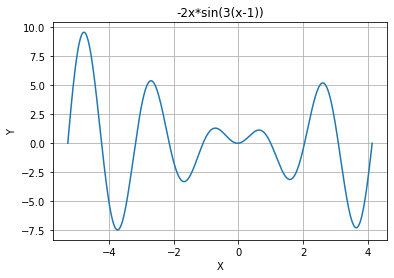

In [160]:
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]
text = "-2x*sin(3(x-1))"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.grid()
plt.show()

## Wersja Pythona

In [161]:
print(version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


## Funkcje

#### Węzły równoodległe

In [162]:
def equal_dist_nodes(a,b,n):
    return [a+x*(b-a)/n for x in range(n+1)]

#### Węzły Czebyszewa

In [163]:
def chebyshew_nodes(a,b,n):
    return [cos((2*x-1)*pi/(2*n))*((b-a)/2)+(a+b)/2 for x in range(1,n+1)]

#### Współczynniki wielomianu algebraicznego

In [164]:
def polynomial_coef(nodes, nodes_func, n, m):
    if m>n:
        exit("m should be less than or equal to n")
    A = []
    b = []
    xs = np.array(nodes)
    ys = np.array(nodes_func)
    for i in range(m+1):
        A.append([0]*(m+1))
        b.append(0)
    for i in range(m+1):
        for j in range(m+1):
            A[i][j] = sum(xs**(i+j))
    for i in range(m+1):
        b[i] = sum(ys*(xs**i))
    A = np.array(A)
    b = np.array(b)
    coef = np.linalg.solve(A, b)
    return coef

#### Obliczenie wartości wielomianu

In [165]:
def calc_polynomial(coef, xs):
    ys = []
    n = len(coef)-1
    for x in xs:
        result = coef[n]
        for i in range(n, 0, -1):
            result = result*x+coef[i-1]
        ys.append(result)
    return ys

#### Obliczanie współczynników a wielomianu trygonometrycznego

In [166]:
def a_j_coef(nodes, j, func):
    l = (b-a)/2
    if j == 0:
        return sum([func(node) for node in nodes])/l
    vals = [func(nodes[i])*cos(j*pi*nodes[i]/l) for i in range(len(nodes))]
    return sum(vals)/l

#### Obliczanie współczynników b wielomianu trygonometrycznego

In [167]:
def b_j_coef(nodes, j, func):
    l = (b-a)/2
    vals = [func(nodes[i])*sin(j*pi*nodes[i]/l) for i in range(len(nodes))]
    return sum(vals)/l

#### Obliczanie wartości wielomianu trygonometrycznego dla punktu

In [168]:
def trig_approx(x, nodes, func, m):
    value = a_j_coef(nodes, 0, func)/2
    l = (b-a)/2
    for k in range(1, m+1):
        # print(k, a_j_coef(nodes, k, func), b_j_coef(nodes, k, func))
        value = value + a_j_coef(nodes, k, func)*cos(k*pi*x/l) + b_j_coef(nodes, k, func)*sin(k*pi*x/l)
    return value

## Testowy program

#### Początkowe ustawienia

In [176]:
n = 7 # generuje n węzłów
m = 4 # stopień wielomianu, czyli współczynników m+1
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
ch_nodes = chebyshew_nodes(a,b,n)
ch_nodes_func = [f(x) for x in ch_nodes]

In [177]:
test = polynomial_coef(eq_nodes, eq_nodes_func, n, m)
ys = calc_polynomial(test, xs)

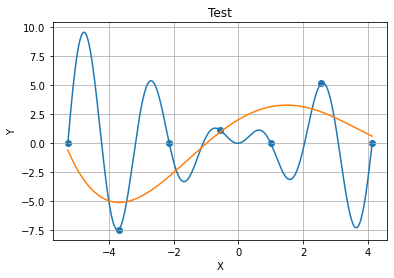

In [178]:
func = [f(x) for x in xs]
text = "Test"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func)
plt.grid()
plt.show()

In [179]:
test2 = polynomial_coef(ch_nodes, ch_nodes_func, n, m)
ys2 = calc_polynomial(test2, xs)

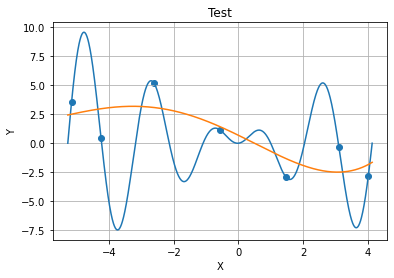

In [180]:
func = [f(x) for x in xs]
text = "Test"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys2)
plt.scatter(ch_nodes,ch_nodes_func)
plt.grid()
plt.show()

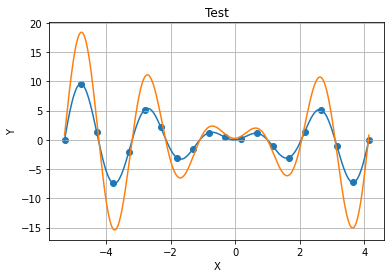

In [181]:
n = 20 # test dla aproksymacji trygonometrycznej
m = 6
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
ys = [trig_approx(x, eq_nodes, f, m) for x in xs]
func = [f(x) for x in xs]
text = "Test"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func)
plt.grid()
plt.show()

## Wykresy

#### Aproksymacja wielomianami algebraicznymi

###### Węzły równoodległe

Najlepsze uzyskane dopasowanie

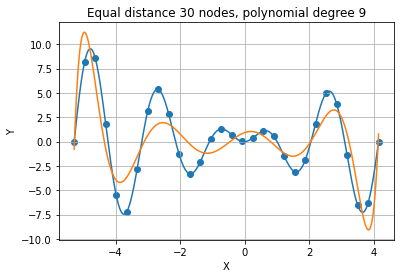

In [230]:
n = 30
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
coef = polynomial_coef(eq_nodes, eq_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

text = "Equal distance {0} nodes, polynomial degree {1}".format(n, m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func)
plt.grid()
plt.show()

W wielu przypadkach, gdy stopień wielomianu jest dużo niższy od liczby węzłów, wzrost jakości dopasowania przy zwiększaniu liczby węzłów jest coraz wolniejszy.

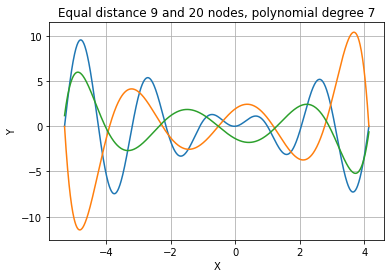

In [237]:
n = 9
m = 7
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
coef = polynomial_coef(eq_nodes, eq_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

n = 20
m = 7
xs2 = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes2 = equal_dist_nodes(a,b,n-1)
eq_nodes_func2 = [f(x) for x in eq_nodes2]
coef2 = polynomial_coef(eq_nodes2, eq_nodes_func2, n, m)
ys2 = calc_polynomial(coef2, xs2)

text = "Equal distance 9 and 20 nodes, polynomial degree {0}".format(m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.grid()
plt.show()

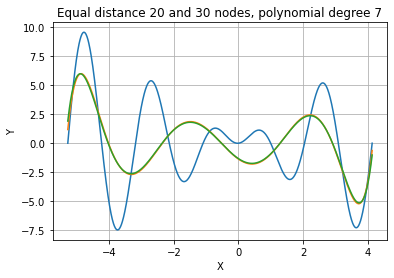

In [238]:
n = 20
m = 7
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
coef = polynomial_coef(eq_nodes, eq_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

n = 30
m = 7
xs2 = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes2 = equal_dist_nodes(a,b,n-1)
eq_nodes_func2 = [f(x) for x in eq_nodes2]
coef2 = polynomial_coef(eq_nodes2, eq_nodes_func2, n, m)
ys2 = calc_polynomial(coef2, xs2)

text = "Equal distance 20 and 30 nodes, polynomial degree {0}".format(m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.grid()
plt.show()

###### Węzły Czebyszewa

Najlepsze uzyskane dopasowanie

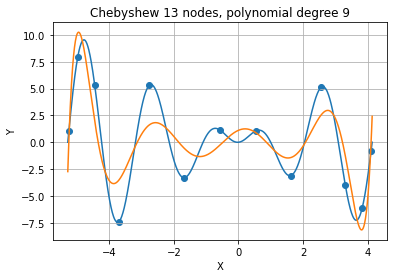

In [231]:
n = 13
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
ch_nodes = chebyshew_nodes(a,b,n)
ch_nodes_func = [f(x) for x in ch_nodes]
coef = polynomial_coef(ch_nodes, ch_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

text = "Chebyshew {0} nodes, polynomial degree {1}".format(n, m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(ch_nodes, ch_nodes_func)
plt.grid()
plt.show()

Ponownie sprawdzono jak wzrost liczby węzłów wpływa na poprawę jakości dopasowania.

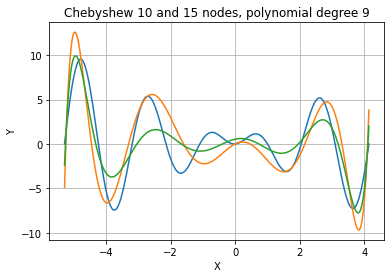

In [239]:
n = 10
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
ch_nodes = chebyshew_nodes(a,b,n)
ch_nodes_func = [f(x) for x in ch_nodes]
coef = polynomial_coef(ch_nodes, ch_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

n = 15
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
ch_nodes2 = chebyshew_nodes(a,b,n)
ch_nodes_func2 = [f(x) for x in ch_nodes2]
coef2 = polynomial_coef(ch_nodes2, ch_nodes_func2, n, m)
ys2 = calc_polynomial(coef2, xs2)

text = "Chebyshew 10 and 15 nodes, polynomial degree {0}".format(m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.grid()
plt.show()

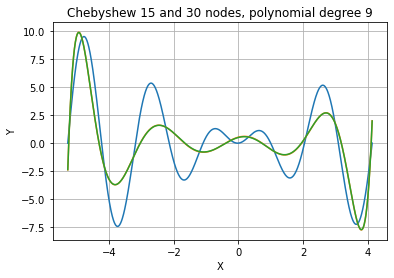

In [240]:
n = 15
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
ch_nodes = chebyshew_nodes(a,b,n)
ch_nodes_func = [f(x) for x in ch_nodes]
coef = polynomial_coef(ch_nodes, ch_nodes_func, n, m)
ys = calc_polynomial(coef, xs)
func = [f(x) for x in xs]

n = 30
m = 9
xs = [a+x*(b-a)/999 for x in range(1000)]
ch_nodes2 = chebyshew_nodes(a,b,n)
ch_nodes_func2 = [f(x) for x in ch_nodes2]
coef2 = polynomial_coef(ch_nodes2, ch_nodes_func2, n, m)
ys2 = calc_polynomial(coef2, xs2)

text = "Chebyshew 15 and 30 nodes, polynomial degree {0}".format(m)
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.grid()
plt.show()

#### Aproksymacja wielomianami trygonometrycznymi

###### Najlepsze dopasowanie

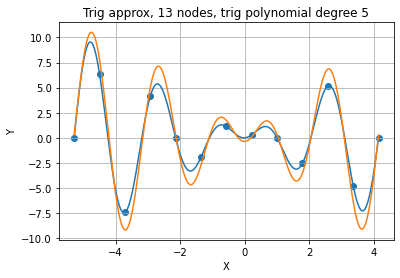

In [233]:
n = 13
m = 5
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
ys = [trig_approx(x, eq_nodes, f, m) for x in xs]
func = [f(x) for x in xs]
text = "Trig approx, 13 nodes, trig polynomial degree 5"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.scatter(eq_nodes,eq_nodes_func)
plt.grid()
plt.show()

Tym razem zwiększenie liczby węzłów niekoniecznie wpływa na poprawę jakości dopasowania.

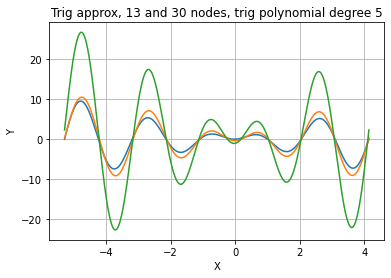

In [241]:
n = 13
m = 5
xs = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes = equal_dist_nodes(a,b,n-1)
eq_nodes_func = [f(x) for x in eq_nodes]
ys = [trig_approx(x, eq_nodes, f, m) for x in xs]
func = [f(x) for x in xs]

n = 30
m = 5
xs2 = [a+x*(b-a)/999 for x in range(1000)]
eq_nodes2 = equal_dist_nodes(a,b,n-1)
eq_nodes_func2 = [f(x) for x in eq_nodes2]
ys2 = [trig_approx(x, eq_nodes2, f, m) for x in xs2]

text = "Trig approx, 13 and 30 nodes, trig polynomial degree 5"
plt.title(text)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs,func)
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.grid()
plt.show()

## Dokładność

#### Aproksymacja wielomianami algebraicznymi

###### Odległość Czebyszewa

In [193]:
def chebyshew_dist(xs,f,ys):
    dist = [abs(f[i]-ys[i]) for i in range(len(xs))]
    return max(dist)

###### Błąd średniokwadratowy

In [194]:
def mse(xs,f,ys):
    components = [(f[i]-ys[i])**2 for i in range(len(xs))]
    return sum(components)/len(xs)

###### Konfiguracja

In [195]:
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]
amount_of_nodes = [4, 5, 7, 10, 13, 15, 18, 20, 25, 30]
polynomial_degree = [3, 4, 5, 6, 7, 8, 9]

###### Węzły równoodległe

In [216]:
print("St. wielomianu\tWęzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for m in polynomial_degree:
    for n in amount_of_nodes:
        if m < n:
            eq_nodes = equal_dist_nodes(a, b ,n - 1)
            eq_nodes_func = [f(node) for node in eq_nodes]
            coef = polynomial_coef(eq_nodes, eq_nodes_func, n, m)
            ys = calc_polynomial(coef, xs)
            dist = chebyshew_dist(xs, func, ys)
            MSE = mse(xs, func, ys)
            print(m,"\t\t",n,"\t",'%.4f'%dist,"\t",'%.4f'%MSE)

St. wielomianu	Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
3 		 4 	 9.5424 	 15.3296
3 		 5 	 11.3369 	 21.4058
3 		 7 	 12.1426 	 25.2248
3 		 10 	 9.5424 	 15.3296
3 		 13 	 8.5753 	 13.8500
3 		 15 	 8.1762 	 13.3151
3 		 18 	 7.8020 	 12.8187
3 		 20 	 7.8213 	 12.6030
3 		 25 	 7.8531 	 12.2703
3 		 30 	 7.8732 	 12.0891
4 		 5 	 11.2934 	 21.4052
4 		 7 	 12.7825 	 25.8827
4 		 10 	 9.5424 	 15.3296
4 		 13 	 8.5825 	 13.8467
4 		 15 	 8.1877 	 13.3080
4 		 18 	 7.7676 	 12.8064
4 		 20 	 7.7286 	 12.5878
4 		 25 	 7.7320 	 12.2498
4 		 30 	 7.7325 	 12.0651
5 		 7 	 17.0735 	 38.9605
5 		 10 	 9.5424 	 15.3296
5 		 13 	 8.1252 	 13.9249
5 		 15 	 8.0262 	 13.4819
5 		 18 	 7.9478 	 12.9843
5 		 20 	 7.8853 	 12.7275
5 		 25 	 7.7405 	 12.2584
5 		 30 	 7.6229 	 11.9489
6 		 7 	 16.5356 	 38.7935
6 		 10 	 9.5424 	 15.3296
6 		 13 	 8.0095 	 13.9115
6 		 15 	 8.0123 	 13.4734
6 		 18 	 7.9368 	 12.9806
6 		 20 	 7.8765 	 12.7257
6 		 25 	 7.7363 	 12.2593
6 		 30 	 7.6216 	 11.

###### Węzły Czebyszewa

In [221]:
print("St. wielomianu\tWęzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for m in polynomial_degree:
    for n in amount_of_nodes:
        if m < n:
            ch_nodes = chebyshew_nodes(a, b ,n)
            ch_nodes_func = [f(node) for node in ch_nodes]
            coef = polynomial_coef(ch_nodes, ch_nodes_func, n, m)
            ys = calc_polynomial(coef, xs)
            dist = chebyshew_dist(xs, func, ys)
            MSE = mse(xs, func, ys)
            print(m,"\t\t",n,"\t",'%.4f'%dist,"\t",'%.4f'%MSE)

St. wielomianu	Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
3 		 4 	 13.0693 	 23.4759
3 		 5 	 8.2065 	 13.9966
3 		 7 	 10.8634 	 17.5651
3 		 10 	 8.5225 	 12.3451
3 		 13 	 8.0540 	 11.9723
3 		 15 	 8.0571 	 11.9740
3 		 18 	 8.0571 	 11.9740
3 		 20 	 8.0571 	 11.9740
3 		 25 	 8.0571 	 11.9740
3 		 30 	 8.0571 	 11.9740
4 		 5 	 9.1683 	 14.2702
4 		 7 	 10.5789 	 17.6086
4 		 10 	 8.5755 	 12.3594
4 		 13 	 7.9436 	 11.9532
4 		 15 	 7.9477 	 11.9549
4 		 18 	 7.9477 	 11.9549
4 		 20 	 7.9477 	 11.9549
4 		 25 	 7.9477 	 11.9549
4 		 30 	 7.9477 	 11.9549
5 		 7 	 9.4176 	 20.8627
5 		 10 	 8.2417 	 12.2380
5 		 13 	 8.2583 	 12.4902
5 		 15 	 8.2481 	 12.4604
5 		 18 	 8.2480 	 12.4600
5 		 20 	 8.2480 	 12.4600
5 		 25 	 8.2480 	 12.4600
5 		 30 	 8.2480 	 12.4600
6 		 7 	 9.5199 	 20.9149
6 		 10 	 8.2965 	 12.2825
6 		 13 	 8.2041 	 12.5049
6 		 15 	 8.1951 	 12.4737
6 		 18 	 8.1949 	 12.4732
6 		 20 	 8.1949 	 12.4732
6 		 25 	 8.1949 	 12.4732
6 		 30 	 8.1949 	 12.473

#### Aproksymacja funkcjami trygonometrycznymi

###### Konfiguracja

In [224]:
xs = [a+x*(b-a)/999 for x in range(1000)]
func = [f(x) for x in xs]
amount_of_nodes = [7, 10, 13, 15, 18, 20, 25, 30]
polynomial_max_degree = [3, 4, 5, 6, 7, 8, 9]

###### Wyniki

In [227]:
print("St. f. bazowych\tWęzłów\tOdl. Czebyszewa\tBłąd średniokwadratowy")
for m in polynomial_max_degree:
    for n in amount_of_nodes:
        if m*2 < n:
            eq_nodes = equal_dist_nodes(a,b,n-1)
            eq_nodes_func = [f(x) for x in eq_nodes]
            ys = [trig_approx(x, eq_nodes, f, m) for x in xs]
            dist = chebyshew_dist(xs, func, ys)
            MSE = mse(xs, func, ys)
            print(m,"\t\t",n,"\t",'%.4f'%dist,"\t",'%.4f'%MSE)       

St. f. bazowych	Węzłów	Odl. Czebyszewa	Błąd średniokwadratowy
3 		 7 	 11.9137 	 21.2774
3 		 10 	 9.5424 	 15.3296
3 		 13 	 8.6480 	 15.1619
3 		 15 	 8.3480 	 15.1719
3 		 18 	 7.9619 	 15.2299
3 		 20 	 7.7222 	 15.2920
3 		 25 	 7.5325 	 15.5222
3 		 30 	 7.6619 	 15.8556
4 		 10 	 9.5424 	 15.3296
4 		 13 	 4.4318 	 8.0849
4 		 15 	 5.2158 	 9.3145
4 		 18 	 6.3527 	 12.4744
4 		 20 	 7.1046 	 15.4506
4 		 25 	 8.9794 	 25.9306
4 		 30 	 10.8518 	 40.7523
5 		 13 	 1.9793 	 1.0416
5 		 15 	 3.5708 	 3.5331
5 		 18 	 6.0560 	 9.8055
5 		 20 	 7.9360 	 15.6867
5 		 25 	 12.6160 	 36.3612
5 		 30 	 17.2788 	 65.5787
6 		 13 	 2.4864 	 1.0912
6 		 15 	 3.9205 	 3.4631
6 		 18 	 6.9102 	 9.7775
6 		 20 	 8.8912 	 15.7014
6 		 25 	 13.8160 	 36.5245
6 		 30 	 18.7238 	 65.9502
7 		 15 	 4.2852 	 3.4935
7 		 18 	 7.2936 	 9.7835
7 		 20 	 9.3039 	 15.7122
7 		 25 	 14.3110 	 36.5576
7 		 30 	 19.3097 	 66.0160
8 		 18 	 7.5697 	 9.7974
8 		 20 	 9.5725 	 15.7228
8 		 25 	 14.6058 	 36.5